# Final Project Data Cleaning

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('spotify_data_1986_2023.csv') #import dataset
print(df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'track_id', 'track_name', 'popularity',
       'available_markets', 'disc_number', 'duration_ms', 'explicit',
       'track_number', 'href', 'album_id', 'album_name', 'album_release_date',
       'album_type', 'album_total_tracks', 'artists_names', 'artists_ids',
       'principal_artist_id', 'principal_artist_name', 'artist_genres',
       'principal_artist_followers', 'acousticness', 'analysis_url',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'year', 'duration_min'],
      dtype='object')


## Remove Irrelevant Columns

In [4]:
dropping = ['Unnamed: 0.1', 'Unnamed: 0', 'href', 'artists_ids', 'principal_artist_id', 'analysis_url', 'album_id'] #drop irrelevant columns
df = df.drop(dropping, axis = 1)
df

,track_id,track_name,popularity,available_markets,disc_number,duration_ms,explicit,track_number,album_name,album_release_date,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,year,duration_min
0,2A6yzRGMgSQCUapR2ptm6A,True Colors,73,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,227600,False,4,True Colors,1986-10-14 00:00:00,...,0.0,0.1160,-13.155,1.0,0.0331,171.282,4.0,0.268,1986,3.793333
1,3gKwVWwKmeuFtPubICbOGc,Paul Revere,61,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,220840,False,9,Licensed To Ill,1986-11-15 00:00:00,...,6.0,0.2280,-13.232,0.0,0.9440,91.753,4.0,0.578,1986,3.680667
2,2tY1gxCKslfXLFpFofYmJQ,Brass Monkey,68,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,157440,False,11,Licensed To Ill,1986-11-15 00:00:00,...,6.0,0.0992,-8.435,0.0,0.3300,116.371,4.0,0.655,1986,2.624000
3,31dqpLUModJWNbxrXu6TWd,Shot in the Dark,66,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,256293,False,9,The Ultimate Sin,1986-02-22 00:00:00,...,6.0,0.1420,-7.262,1.0,0.0324,123.887,3.0,0.619,1986,4.271550
4,00vYs0qZA40Z8AAaN7xmMO,Manic Monday,63,AE;BH;EG;GB;IE;IQ;JO;KW;LB;LY;OM;PS;QA;SA;US,1,184160,False,1,Different Light (Expanded Edition),1986-01-01 00:00:00,...,2.0,0.3580,-10.906,1.0,0.0289,121.761,4.0,0.853,1986,3.069333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11445,4nrPB8O7Y7wsOCJdgXkthe,"Shakira: Bzrp Music Sessions, Vol. 53",89,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,214945,False,1,"Shakira: Bzrp Music Sessions, Vol. 53",2023-01-11 00:00:00,...,2.0,0.0915,-5.600,0.0,0.0493,122.104,4.0,0.498,2023,3.582417
11446,7Lkxvfl2rkNYWS4kBDCQtN,Las Morras,81,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,155550,True,1,Las Morras,2023-04-04 00:00:00,...,9.0,0.0706,-4.641,0.0,0.0407,133.007,3.0,0.901,2023,2.592500
11447,6UoKX6uLJwhsnyTp5k5StP,The Painter,75,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,211413,False,1,The Painter,2023-08-11 00:00:00,...,2.0,0.1070,-5.766,1.0,0.0329,97.981,4.0,0.261,2023,3.523550
11448,4ZYAU4A2YBtlNdqOUtc7T2,Red Ruby Da Sleeze,78,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,214445,True,1,Red Ruby Da Sleeze,2023-03-03 00:00:00,...,1.0,0.1110,-6.181,1.0,0.2560,98.355,4.0,0.292,2023,3.574083


## Look at the amount of letters and amount of words in the track name

### First let's drop the duplicates

In [5]:
df.drop_duplicates(subset='track_name', inplace=True) #first drop duplicates
df[df['track_name'] == "Gonna Make You Sweat (Everybody Dance Now) (feat. Freedom Williams)"] #check it worked, yay it did!

,track_id,track_name,popularity,available_markets,disc_number,duration_ms,explicit,track_number,album_name,album_release_date,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,year,duration_min
1246,7eheoW4hxrH51ww2QePVwF,Gonna Make You Sweat (Everybody Dance Now) (fe...,71,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,244093,False,1,Super Hits,1990-01-01 00:00:00,...,6.0,0.183,-7.405,1.0,0.0935,112.187,4.0,0.794,1990,4.068217


### Now let's start looking at the names, there are some special cases to see that we don't want counted when we sum the letters

In [6]:
special_cases = df[
    df['track_name'].str.contains(r'\([A-Za-z0-9 ].*\)$', regex=True) | #has parentheses
    df['track_name'].str.contains(r'-\s*[A-Za-z].*$', regex=True) | #has a dash
    df['track_name'].str.contains(r':\s*[A-Za-z].*$', regex=True) #has a colon
]

# Show only the track_name column
print(special_cases['track_name'])

print(len(special_cases))

26                                    Battery (Remastered)
27                          Master of Puppets (Remastered)
31                                Only You (And You Alone)
34       Holding Out for a Hero - From "Footloose" Soun...
47                         Walk This Way (feat. Aerosmith)
                               ...                        
11429                            Pull Up (feat. 21 Savage)
11430                                   MONTAGEM - PR FUNK
11444         AMERICA HAS A PROBLEM (feat. Kendrick Lamar)
11445                Shakira: Bzrp Music Sessions, Vol. 53
11449                     Angels (Don’t Always Have Wings)
Name: track_name, Length: 1696, dtype: object
1696


##### So it looks like there are 1696 cases, wow that is a lot!

### Let's try to remove all of the irrelevant ones while keeping things like "(Live)" or parts of the title like "Only You (And You Alone)"	

In [7]:
# clean track names
import re

df['clean_track_name'] = df['track_name'].str.replace(
    r'\s*(\((?:feat\.?|featuring|with)[^)]*\)|\([^)]*(revisited|remaster(?:ed)?)[^)]*\)|[-–—].*|:.*)$',
    '',
    regex=True,
    flags=re.IGNORECASE, #replaces my key words regardless of if it is capital or lowercase
).str.strip()

# note for str.replace:
# \s*                         → optional spaces before extra info
# \( ... \)                   → matches parentheses
# (?:feat\.?|featuring|with)  → only removes parentheses if they start with "feat", "feat.", or "featuring", or "with"
# [^)]*                       → match everything inside the parentheses until the closing parenthesis
# \([^)]*(revisited|remaster(?:ed)?)[^)]*  → removes parentheses containing "revisited", "remaster", or "remastered" anywhere inside
# [-–—].*                      → match a dash (-), en dash (–), or em dash (—) and everything after it (at the end)
# :.*                          → match a colon and everything after it (at the end)
# $                            → only match at the end of the string
# flags=re.IGNORECASE          → makes regex case-insensitive (so "Remastered" is matched)
# .str.strip()                 → removes extra spaces left at the beginning or end

#move clean tarck name so it is next to track name
clean_col = df.pop('clean_track_name')
df.insert(2, 'clean_track_name', clean_col)

# Count letters can make new column!

# Count letters + numbers (all languages)
letter_num_count = df['clean_track_name'].apply(lambda x: sum(c.isalnum() for c in str(x)))

# Remove existing column if it already is there - this will let me edit the code above without it giving me an error that teh column already exists
if 'letters_track_name' in df.columns:
    df.drop(columns='letters_track_name', inplace=True)

# Insert next to clean track name column so I can see them side by side
df.insert(3, 'letters_track_name', letter_num_count)

#look at it to check :)
pd.set_option('display.max_rows', 50)
df[['track_name', 'clean_track_name', "letters_track_name"]].sample(50, random_state=42) #show me a random 50 so I can check my work

,track_name,clean_track_name,letters_track_name
5634,A Boy Brushed Red Living In Black And White,A Boy Brushed Red Living In Black And White,35
9756,Unbothered,Unbothered,10
1348,Is She Weird,Is She Weird,10
4171,Unpretty,Unpretty,8
1893,Black or White,Black or White,12
4594,Yo No Soy Esa Mujer,Yo No Soy Esa Mujer,15
3820,"Quizás Si, Quizás No","Quizás Si, Quizás No",16
8452,r - Cali,r,1
11004,No Se Va - EN VIVO,No Se Va,6
6809,二十歳の恋,二十歳の恋,5


##### Okay so it is not perfect, there are some weird exceptions but that is okay. I got most of the stuff out. Let me look at the full data set again just for calrity.

In [8]:
df.sample(10, random_state=46)

,track_id,track_name,clean_track_name,letters_track_name,popularity,available_markets,disc_number,duration_ms,explicit,track_number,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,year,duration_min
10915,3k3NWokhRRkEPhCzPmV8TW,Ojitos Lindos,Ojitos Lindos,12,89,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,258298,False,14,...,3.0,0.5280,-5.745,0.0,0.0413,79.928,4.0,0.268,2022,4.304967
3950,1fotoYONO343JjbC8XvPSl,Moment Of Truth,Moment Of Truth,13,59,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,247333,True,8,...,6.0,0.3710,-5.282,0.0,0.2560,90.215,4.0,0.594,1998,4.122217
4714,6uRH1qMz30ZBwwUG0IYE5s,Dance With Me,Dance With Me,11,65,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,231800,False,2,...,9.0,0.0442,-6.365,1.0,0.2030,101.628,4.0,0.611,2001,3.863333
6885,4gzeYkzuzxuzAUTsGcdjqA,It Won't Be Like This For Long,It Won't Be Like This For Long,23,63,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,219000,False,8,...,4.0,0.1100,-6.001,1.0,0.0287,143.863,4.0,0.389,2008,3.650000
5544,3xrn9i8zhNZsTtcoWgQEAd,Since U Been Gone,Since U Been Gone,14,75,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,188960,False,2,...,0.0,0.1140,-5.406,1.0,0.0334,131.000,4.0,0.404,2004,3.149333
8017,24LS4lQShWyixJ0ZrJXfJ5,Sweet Nothing (feat. Florence Welch),Sweet Nothing,12,76,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,212560,False,10,...,8.0,0.0567,-3.942,0.0,0.1090,127.934,4.0,0.582,2012,3.542667
10395,3hLuHKzG1cmlRpq53ZVWd8,The Good Ones,The Good Ones,11,76,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,215140,False,7,...,2.0,0.1490,-5.023,1.0,0.0259,89.957,4.0,0.331,2020,3.585667
7749,725NSbIej5lP3GfhLC7So3,115,115,3,68,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,228160,False,14,...,8.0,0.1020,-3.808,1.0,0.1750,200.215,4.0,0.676,2011,3.802667
8224,4sebUbjqbcgDSwG6PbSGI0,Come a Little Closer,Come a Little Closer,17,75,AU;CA;CY;DO;HK;IS;MT;MX;NZ;TW;TR;US;ID;JP;RO;I...,1,229346,False,2,...,1.0,0.1510,-1.786,0.0,0.0327,148.038,4.0,0.304,2013,3.822433
3530,6cKWDVak6o362TElLvwtmU,Suavecito Suavecito,Suavecito Suavecito,18,67,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,225720,False,4,...,0.0,0.0621,-11.398,1.0,0.0413,96.267,4.0,0.923,1997,3.762000


##### Looks beautiful :)

## Calculate how many countries the song is available in

In [9]:
# count the markets by taking everything between semicolons and making it a string ex: 'US', then it counts the amount of strings within this list
market_count = df['available_markets'].str.split(';').str.len()

# Remove existing column if it exists
if 'market_count' in df.columns:
    df.drop(columns='market_count', inplace=True)

# Insert next to markets for readibility
df.insert(df.columns.get_loc('available_markets') + 1, 'market_count', market_count)

In [10]:
# Check dataset
df.sample(10, random_state=14)

,track_id,track_name,clean_track_name,letters_track_name,popularity,available_markets,market_count,disc_number,duration_ms,explicit,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,year,duration_min
443,7KA6U0WOHdGxWWLGPYN2Sb,On the Turning Away,On the Turning Away,16,58,AR;AU;BO;BR;CA;CL;CO;CR;DO;EC;SV;GT;HN;HK;MY;M...,128.0,1,341666,False,...,7.0,0.0760,-12.135,1.0,0.0300,100.454,4.0,0.2440,1987,5.694433
827,1Xf1lWBSml62NG1du3Ro14,Just The Way You Are,Just The Way You Are,16,66,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,184.0,1,289106,False,...,9.0,0.1490,-14.630,1.0,0.0494,74.948,4.0,0.3090,1988,4.818433
877,64IOxX7fXk89bMG2831w4G,Goodbye Time,Goodbye Time,11,47,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,184.0,1,207533,False,...,2.0,0.1110,-17.392,1.0,0.0317,147.117,4.0,0.2710,1988,3.458883
6849,4LloVtxNZpeh7q7xdi1DQc,"Free Fallin' - Live at the Nokia Theatre, Los ...",Free Fallin',10,75,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,184.0,1,263573,False,...,5.0,0.7020,-13.262,1.0,0.0315,173.509,4.0,0.4350,2008,4.392883
2083,00QAndVDVfNqNWYdWAhEan,Who Wants To Live Forever - Remastered 2011,Who Wants To Live Forever,21,50,CA;US,2.0,1,295346,False,...,4.0,0.1150,-8.670,0.0,0.0361,87.476,5.0,0.0383,1991,4.922433
9823,4MXhiYIRDMGAuvZc5IFTwC,ASTROTHUNDER,ASTROTHUNDER,12,78,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,184.0,1,142969,True,...,4.0,0.1110,-8.111,0.0,0.0661,151.901,4.0,0.2860,2018,2.382817
7694,0Uybrtb766jul6WpkjqbID,Hard Times,Hard Times,9,70,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,176.0,1,178160,False,...,7.0,0.1020,-13.641,1.0,0.0333,133.230,3.0,0.4000,2011,2.969333
7203,76LGCP0g9nVknR7HD2Jjyp,Not The American Average,Not The American Average,21,65,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,183.0,1,279226,True,...,2.0,0.2780,-4.106,0.0,0.1930,184.975,4.0,0.0676,2009,4.653767
5387,5TpaWJKnuyA4MjzAbFXSTQ,Damn! (feat. Lil' Jon) - Club Mix,Damn! (feat. Lil' Jon),14,59,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;E...,183.0,1,298600,True,...,6.0,0.3550,-5.799,0.0,0.3070,84.038,4.0,0.5180,2003,4.976667
4454,4oPNN7syJYSjzDhRerF966,Untitled (How Does It Feel),Untitled (How Does It Feel),21,60,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,184.0,1,430800,False,...,4.0,0.0828,-9.975,0.0,0.0626,112.618,3.0,0.2210,2000,7.180000


## Count how many artists made/are on the track

In [11]:
df['artists_names'].sample(5, random_state=16)

4930                                                 Trapt
5167                                                  Beck
6827     Angel Y Khriz;Gocho "El Lápiz De Platino";John...
10428    DJ Scheme;Ski Mask The Slump God;Danny Towers;...
322                                                   INXS
Name: artists_names, dtype: object

##### Looks like I can do the same thing I did for markets

In [12]:
df.columns.get_loc('artists_names')

15

In [13]:
# count the artists by taking everything between semicolons and making it a string ex: 'Taylor Swift', then it counts the amount of strings within this list
artist_numb = df['artists_names'].str.split(';').str.len()

# Remove existing column if it exists
if 'artist_numb' in df.columns:
    df.drop(columns='artist_numb', inplace=True)

# Insert next to markets for readibility
df.insert(df.columns.get_loc('artists_names') + 1, 'artist_numb', artist_numb)

In [14]:
df.iloc[:, 16:21].sample(5, random_state=16) #look at the added column to check (before "," = all rows, show all the columns)

,artist_numb,principal_artist_name,artist_genres,principal_artist_followers,acousticness
4930,1,Trapt,alternative metal;nu metal;post-grunge,1072711.0,0.000172
5167,1,Beck,alternative rock;anti-folk;permanent wave;rock,1466809.0,0.260000
6827,3,Angel Y Khriz,latin hip hop;reggaeton,1008284.0,0.184000
10428,4,DJ Scheme,viral rap,254790.0,0.074000
322,1,INXS,australian rock;dance rock;funk rock;new roman...,2457267.0,0.071300


## Now calculate how many genres the main artist produces in 

In [15]:
df['artist_genres'].sample(5, random_state=16)

4930                alternative metal;nu metal;post-grunge
5167        alternative rock;anti-folk;permanent wave;rock
6827                               latin hip hop;reggaeton
10428                                            viral rap
322      australian rock;dance rock;funk rock;new roman...
Name: artist_genres, dtype: object

##### Again, looks like I can do the same thing I did for markets

In [16]:
df.columns.get_loc('artist_genres')

18

In [17]:
# count the genres by taking everything between semicolons and making it a string ex: 'Pop', then it counts the amount of strings within this list
genres_numb = df['artist_genres'].str.split(';').str.len()

# Remove existing column if it exists
if 'genres_numb' in df.columns:
    df.drop(columns='genres_numb', inplace=True)

# Insert next to markets for readibility
df.insert(df.columns.get_loc('artist_genres') + 1, 'genres_numb', genres_numb)

In [18]:
df.iloc[:, 19:24].sample(5, random_state=30) #look at the added column to check (before "," = all rows, show all the columns)

,genres_numb,principal_artist_followers,acousticness,danceability,energy
9624,2.0,50572176.0,0.0185,0.704,0.859
2879,5.0,683645.0,0.0287,0.754,0.785
398,8.0,632734.0,0.0139,0.927,0.832
11374,1.0,6957293.0,0.2800,0.415,0.573
8315,3.0,5646381.0,0.0737,0.343,0.536


## Now let's look at the album release date and do some stuff with that

In [19]:
df['album_release_date'].sample(5, random_state=16)

4930     2002-11-05 00:00:00
5167     2002-01-01 00:00:00
6827     2008-01-01 00:00:00
10428    2020-12-04 00:00:00
322      1987-01-01 00:00:00
Name: album_release_date, dtype: object

##### Let's figure out the month and day of the week they were released in. Right now we only have this format 1986-10-14 00:00:00.

In [20]:
df.columns.get_loc('album_release_date')

12

In [21]:
# change column is datetime
df['album_release_date'] = pd.to_datetime(df['album_release_date'])

# Create new columns
df['release_month'] = df['album_release_date'].dt.month
df['release_weekday'] = df['album_release_date'].dt.weekday

#move columns to be next to the original album release date one
month_col = df.pop('release_month')
df.insert(df.columns.get_loc('album_release_date') + 1, 'release_month', month_col)

weekday_col = df.pop('release_weekday')
df.insert(df.columns.get_loc('album_release_date') + 2, 'release_weekday', weekday_col)

In [22]:
df.iloc[:, 10:16].sample(5, random_state=30) #look at the added column to check (before "," = all rows, show all the columns)

,track_number,album_name,album_release_date,release_month,release_weekday,album_type
9624,1,Finesse (Remix) [feat. Cardi B],2017-12-20,12,2,single
2879,4,Labcabincalifornia (Deluxe Edition),1995-01-01,1,6,album
398,13,The Whispers: Greatest Hits,1987-01-01,1,3,compilation
11374,36,One Thing At A Time,2023-03-03,3,4,album
8315,8,PARTYNEXTDOOR,2013-07-01,7,0,album


##### Okay cool. Lastly, release year is at the end of the data set right now but it kinda goes with these things so im gonna move it.

In [23]:
release_year = df.pop('year')
df.insert(df.columns.get_loc('album_release_date') + 3, 'year', release_year)

In [24]:
df.iloc[:, 10:16].sample(5, random_state=30) #check again

,track_number,album_name,album_release_date,release_month,release_weekday,year
9624,1,Finesse (Remix) [feat. Cardi B],2017-12-20,12,2,2017
2879,4,Labcabincalifornia (Deluxe Edition),1995-01-01,1,6,1995
398,13,The Whispers: Greatest Hits,1987-01-01,1,3,1987
11374,36,One Thing At A Time,2023-03-03,3,4,2023
8315,8,PARTYNEXTDOOR,2013-07-01,7,0,2013


## Okay, now I feel like our data set has some good information! Let's just check for N/As to clean it up completely.

In [25]:
df.isna().sum()

track_id                        0
track_name                      0
clean_track_name                0
letters_track_name              0
popularity                      0
available_markets               1
market_count                    1
disc_number                     0
duration_ms                     0
explicit                        0
track_number                    0
album_name                      0
album_release_date              0
release_month                   0
release_weekday                 0
year                            0
album_type                      0
album_total_tracks              0
artists_names                   0
artist_numb                     0
principal_artist_name           0
artist_genres                 105
genres_numb                   105
principal_artist_followers      0
acousticness                    5
danceability                    5
energy                          5
instrumentalness                5
key                             5
liveness      

##### For genres I think I will just put the median because I don't want to drop all those rows but for the others I think I will drop them for ease

In [27]:
print(df['genres_numb'].median())
df['genres_numb'] = df['genres_numb'].fillna(df['genres_numb'].median())

3.0


##### I am just gonna drop the rest now

In [28]:
df = df.dropna()

##### Let's check

In [29]:
X.isna().sum()

NameError: name 'X' is not defined

##### BEAUTIFUL!!!!

## Run a Multiple Linear Regression to see which variables might affect song popularity!

In [30]:
print(df.columns)

Index(['track_id', 'track_name', 'clean_track_name', 'letters_track_name',
       'popularity', 'available_markets', 'market_count', 'disc_number',
       'duration_ms', 'explicit', 'track_number', 'album_name',
       'album_release_date', 'release_month', 'release_weekday', 'year',
       'album_type', 'album_total_tracks', 'artists_names', 'artist_numb',
       'principal_artist_name', 'artist_genres', 'genres_numb',
       'principal_artist_followers', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'duration_min'],
      dtype='object')


##### All of my columns need to be numeric variables for this to work

In [31]:
df.dtypes

track_id                              object
track_name                            object
clean_track_name                      object
letters_track_name                     int64
popularity                             int64
available_markets                     object
market_count                         float64
disc_number                            int64
duration_ms                            int64
explicit                                bool
track_number                           int64
album_name                            object
album_release_date            datetime64[ns]
release_month                          int32
release_weekday                        int32
year                                   int64
album_type                            object
album_total_tracks                     int64
artists_names                         object
artist_numb                            int64
principal_artist_name                 object
artist_genres                         object
genres_num

In [32]:
irrelevant = ['track_id', 'track_name', 'clean_track_name', 'available_markets', 'album_name', 'album_release_date', 'artists_names', 'principal_artist_name', 'artist_genres'] #remove variables that won't be helpful anymore based on the calculations we made

df_regression = df.drop(columns=irrelevant) #drop them

#convert my categorical columns to numeric
df_regression['explicit'] = df_regression['explicit'].astype(int) 
df_regression['album_type'] = df_regression['album_type'].astype('category').cat.codes

pred = df_regression.drop(columns=['popularity']) #drop target and keep all other columns to be predictors
y = df_regression['popularity'] #target

In [33]:
#check that my "numeric" columns actually are
pred.dtypes.head(50)

letters_track_name              int64
market_count                  float64
disc_number                     int64
duration_ms                     int64
explicit                        int64
track_number                    int64
release_month                   int32
release_weekday                 int32
year                            int64
album_type                       int8
album_total_tracks              int64
artist_numb                     int64
genres_numb                   float64
principal_artist_followers    float64
acousticness                  float64
danceability                  float64
energy                        float64
instrumentalness              float64
key                           float64
liveness                      float64
loudness                      float64
mode                          float64
speechiness                   float64
tempo                         float64
time_signature                float64
valence                       float64
duration_min

In [39]:
pd.options.display.max_columns = None
display(df)

,track_id,track_name,clean_track_name,letters_track_name,popularity,available_markets,market_count,disc_number,duration_ms,explicit,track_number,album_name,album_release_date,release_month,release_weekday,year,album_type,album_total_tracks,artists_names,artist_numb,principal_artist_name,artist_genres,genres_numb,principal_artist_followers,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min
0,2A6yzRGMgSQCUapR2ptm6A,True Colors,True Colors,10,73,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,184.000000,1,227600,False,4,True Colors,1986-10-14,10,1,1986,album,10,Cyndi Lauper,1,Cyndi Lauper,dance pop;new wave pop;permanent wave;soft rock,4.000000,2412278.000000,0.701000,0.397000,0.207000,0.000031,0.000000,0.116000,-13.155000,1.000000,0.033100,171.282000,4.000000,0.268000,3.793333
1,3gKwVWwKmeuFtPubICbOGc,Paul Revere,Paul Revere,10,61,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,184.000000,1,220840,False,9,Licensed To Ill,1986-11-15,11,5,1986,album,13,Beastie Boys,1,Beastie Boys,alternative rock;east coast hip hop;golden age...,8.000000,2609297.000000,0.016100,0.883000,0.553000,0.000000,6.000000,0.228000,-13.232000,0.000000,0.944000,91.753000,4.000000,0.578000,3.680667
2,2tY1gxCKslfXLFpFofYmJQ,Brass Monkey,Brass Monkey,11,68,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,184.000000,1,157440,False,11,Licensed To Ill,1986-11-15,11,5,1986,album,13,Beastie Boys,1,Beastie Boys,alternative rock;east coast hip hop;golden age...,8.000000,2609297.000000,0.002030,0.914000,0.586000,0.000002,6.000000,0.099200,-8.435000,0.000000,0.330000,116.371000,4.000000,0.655000,2.624000
3,31dqpLUModJWNbxrXu6TWd,Shot in the Dark,Shot in the Dark,13,66,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,184.000000,1,256293,False,9,The Ultimate Sin,1986-02-22,2,5,1986,album,9,Ozzy Osbourne,1,Ozzy Osbourne,album rock;alternative metal;birmingham metal;...,9.000000,4954824.000000,0.008350,0.581000,0.791000,0.000060,6.000000,0.142000,-7.262000,1.000000,0.032400,123.887000,3.000000,0.619000,4.271550
4,00vYs0qZA40Z8AAaN7xmMO,Manic Monday,Manic Monday,11,63,AE;BH;EG;GB;IE;IQ;JO;KW;LB;LY;OM;PS;QA;SA;US,15.000000,1,184160,False,1,Different Light (Expanded Edition),1986-01-01,1,2,1986,album,20,The Bangles,1,The Bangles,album rock;jangle pop;mellow gold;new romantic...,9.000000,1315248.000000,0.294000,0.685000,0.594000,0.000004,2.000000,0.358000,-10.906000,1.000000,0.028900,121.761000,4.000000,0.853000,3.069333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11445,4nrPB8O7Y7wsOCJdgXkthe,"Shakira: Bzrp Music Sessions, Vol. 53",Shakira,7,89,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,184.000000,1,214945,False,1,"Shakira: Bzrp Music Sessions, Vol. 53",2023-01-11,1,2,2023,single,1,Bizarrap;Shakira,2,Bizarrap,argentine hip hop;pop venezolano;trap argentin...,5.000000,12294209.000000,0.274000,0.778000,0.632000,0.000000,2.000000,0.091500,-5.600000,0.000000,0.049300,122.104000,4.000000,0.498000,3.582417
11446,7Lkxvfl2rkNYWS4kBDCQtN,Las Morras,Las Morras,9,81,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,184.000000,1,155550,True,1,Las Morras,2023-04-04,4,1,2023,single,1,Peso Pluma;Blessd,2,Peso Pluma,corridos tumbados;sad sierreno,2.000000,6774118.000000,0.312000,0.777000,0.841000,0.000076,9.000000,0.070600,-4.641000,0.000000,0.040700,133.007000,3.000000,0.901000,2.592500
11447,6UoKX6uLJwhsnyTp5k5StP,The Painter,The Painter,10,75,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,183.000000,1,211413,False,1,The Painter,2023-08-11,8,4,2023,single,1,Cody Johnson,1,Cody Johnson,classic texas country;contemporary country,2.000000,932439.000000,0.041500,0.512000,0.709000,0.000004,2.000000,0.107000,-5.766000,1.000000,0.032900,97.981000,4.000000,0.261000,3.523550
11448,4ZYAU4A2YBtlNdqOUtc7T2,Red Ruby Da Sleeze,Red Ruby Da Sleeze,15,78,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,183.

In [40]:
df.describe()

,letters_track_name,popularity,market_count,disc_number,duration_ms,track_number,album_release_date,release_month,release_weekday,year,album_total_tracks,artist_numb,genres_numb,principal_artist_followers,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min
count,10119.000000,10119.000000,10119.000000,10119.000000,10119.000000,10119.000000,10119,10119.000000,10119.000000,10119.000000,10119.000000,10119.000000,10119.000000,10119.000000,10119.000000,10119.000000,10119.000000,10119.000000,10119.000000,10119.000000,10119.000000,10119.000000,10119.000000,10119.000000,10119.000000,10119.000000,10119.000000
mean,12.510821,68.069770,159.008301,1.016405,228975.991303,5.309220,2004-08-24 14:11:08.129261696,5.328194,2.364463,2004.258326,14.248641,1.249926,3.776065,9507767.987449,0.225428,0.611739,0.652720,0.045690,5.265441,0.183409,-7.521953,0.679020,0.089384,121.007037,3.929044,0.539131,3.816267
min,0.000000,44.000000,1.000000,1.000000,33493.000000,1.000000,1986-01-01 00:00:00,1.000000,0.000000,1986.000000,1.000000,1.000000,1.000000,100.000000,0.000000,0.000000,0.000020,0.000000,0.000000,0.000000,-47.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.558217
25%,8.000000,61.000000,180.000000,1.000000,191235.500000,2.000000,1995-03-14 00:00:00,1.000000,1.000000,1995.000000,11.000000,1.000000,2.000000,932439.000000,0.018500,0.506000,0.518000,0.000000,2.000000,0.092300,-9.166000,0.000000,0.034100,96.881500,4.000000,0.347000,3.187258
50%,11.000000,68.000000,184.000000,1.000000,222960.000000,4.000000,2004-07-27 00:00:00,5.000000,2.000000,2004.000000,13.000000,1.000000,3.000000,2947311.000000,0.111000,0.622000,0.674000,0.000005,5.000000,0.125000,-6.711000,1.000000,0.047900,119.003000,4.000000,0.542000,3.716000
75%,15.000000,75.000000,184.000000,1.000000,259040.000000,8.000000,2014-02-25 00:00:00,9.000000,4.000000,2014.000000,16.000000,1.000000,5.000000,8626437.000000,0.359000,0.730000,0.816000,0.000695,8.000000,0.237000,-5.021000,1.000000,0.097000,140.074500,4.000000,0.738000,4.317333
max,76.000000,100.000000,184.000000,10.000000,2238733.000000,48.000000,2023-08-25 00:00:00,12.000000,6.000000,2023.000000,176.000000,40.000000,15.000000,114675033.000000,0.996000,0.988000,1.000000,1.000000,11.000000,0.982000,0.522000,1.000000,0.944000,220.099000,5.000000,0.994000,37.312217
std,6.307550,9.259597,57.880348,0.179850,64894.490718,4.434980,NaN,3.778497,1.826315,10.959361,9.375607,0.771153,1.999569,17924038.484397,0.261631,0.162460,0.205895,0.165414,3.554187,0.146101,3.773064,0.466876,0.094265,30.197313,0.358867,0.245615,1.081575


##### BEAUTIFUL!!!!

##### Now I get to run my model FINALLY

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(pred, y)

LinearRegression()

In [35]:
import statsmodels.api as sm

# Add a constant column for the intercept
pred_sm = sm.add_constant(pred)

# Fit the OLS regression
model = sm.OLS(y, pred_sm).fit()

# Print the full summary
print(model.summary2())

                         Results: Ordinary least squares
Model:                    OLS                  Adj. R-squared:         0.506     
Dependent Variable:       popularity           AIC:                    66659.1416
Date:                     2025-12-08 16:52     BIC:                    66854.1402
No. Observations:         10119                Log-Likelihood:         -33303.   
Df Model:                 26                   F-statistic:            398.9     
Df Residuals:             10092                Prob (F-statistic):     0.00      
R-squared:                0.507                Scale:                  42.393    
---------------------------------------------------------------------------------
                             Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
---------------------------------------------------------------------------------
const                      -875.2074  16.7820 -52.1515 0.0000 -908.1035 -842.3113
letters_track_name           -0.0404   0.

In [36]:
summary_df = pd.DataFrame({
    'coef': model.params,
    'std_err': model.bse,
    't': model.tvalues,
    'p_value': model.pvalues
})

pd.set_option('display.float_format', '{:.6f}'.format) #sets it to not go into scientfiic notation
print(summary_df.to_string())

                                  coef   std_err          t  p_value
const                      -875.207385 16.782011 -52.151521 0.000000
letters_track_name           -0.040449  0.010438  -3.875262 0.000107
market_count                  0.030465  0.001146  26.582909 0.000000
disc_number                  -0.151736  0.403504  -0.376047 0.706890
duration_ms                   0.000001  0.000001   0.962634 0.335754
explicit                     -0.167513  0.189534  -0.883818 0.376816
track_number                 -0.078553  0.015763  -4.983506 0.000001
release_month                 0.100728  0.018282   5.509739 0.000000
release_weekday               0.218341  0.037888   5.762796 0.000000
year                          0.468707  0.008255  56.777259 0.000000
album_type                    0.433719  0.128062   3.386797 0.000710
album_total_tracks           -0.001480  0.008378  -0.176633 0.859800
artist_numb                   0.139821  0.087593   1.596248 0.110465
genres_numb                  -0.08

##### Oh wow so quite a few of them are significant predictors and my R squared is decently high. Seems promising to me!

##### Let's check for multicollinearity just to make sure

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# add constant/beta 0/intercept added
pred_vif = sm.add_constant(pred)

# Compute VIF for each column
vif_df = pd.DataFrame({
    "feature": pred_vif.columns,
    "VIF": [variance_inflation_factor(pred_vif.values, i) #values convert to numpy array
            for i in range(pred_vif.shape[1])] #shape takes all the columns and subtracts 1 so it counts the indexes accurately
}) #so basically go through all calumns and calculate the variance 

print(vif_df)

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                       feature          VIF
0                        const 67225.254413
1           letters_track_name     1.034509
2                 market_count     1.050163
3                  disc_number     1.256947
4                  duration_ms          inf
5                     explicit     1.609970
6                 track_number     1.166390
7                release_month     1.138891
8              release_weekday     1.142766
9                         year     1.953558
10                  album_type     1.242710
11          album_total_tracks     1.472709
12                 artist_numb     1.088994
13                 genres_numb     1.201645
14  principal_artist_followers     1.208237
15                acousticness     1.837259
16                danceability     1.703249
17                      energy     3.412144
18            instrumentalness     1.211604
19                         key     1.020806
20                    liveness     1.055523
21                    loudness  

##### Looks pretty good to me!

# Next Steps

- for each predictor, find the range of values so we know what boundaries to simulate within
- simulate a whole bunch of songs and see trends, what makes something more popular
    - make sure to add noise
    - take like top 10% or something and see what they have in common
    - graphs of course
    - maybe map two features against eachother
    - maybe we could add a random luck factor for going viral
        - likelihoood it goes viral on tiktok or it gets put in a show/movie or some things like that
- maybe have another simulation where you input your own song and it generates a popularity score
    - then you can change one variable and see how it affects the score
    - could make a distribution for teh same song but from 1986 to 2023 to see the change over time
- could do an agent where there are certain probabilities that someone shares a song 

# Start OOP

##### Goal: start by simulating the features of one song, then simulate the popularity of that one song, then we can run that simulation a whole bunch of times and start making some visulaizations

##### Maybe let's start by finding the ranges/proabilities of the data we already have so that we can simulate new songs that are realistic

In [ ]:
print(pred.columns)

Index(['letters_track_name', 'market_count', 'disc_number', 'duration_ms',
       'explicit', 'track_number', 'release_month', 'release_weekday', 'year',
       'album_type', 'album_total_tracks', 'artist_numb', 'genres_numb',
       'principal_artist_followers', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'duration_min'],
      dtype='object')


In [ ]:
continuous_cols = ['letters_track_name', 'market_count', 'disc_number', 'duration_ms',
       'explicit', 'track_number', 'release_month', 'release_weekday', 'year',
       'album_type', 'album_total_tracks', 'artist_numb', 'genres_numb',
       'principal_artist_followers', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'duration_min']
dummy_numeric_columns =
cont_min = pred[continuous_cols].min()
cont_max = pred[continuous_cols].max()
print(cont_max)
print(cont_min)

duration_ms    2238733.000000
energy               1.000000
acousticness         0.996000
danceability         0.988000
loudness             0.522000
dtype: float64
duration_ms    33493.000000
energy             0.000020
acousticness       0.000000
danceability       0.000000
loudness         -47.070000
dtype: float64


In [45]:
df['album_type'] = df['album_type'].astype('category').cat.codes.astype('int8')


/var/folders/71/br_33dt53n948nsmj9czsvr80000gn/T/ipykernel_92638/2143682028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['album_type'] = df['album_type'].astype('category').cat.codes.astype('int8')


# Simulating Songs for Popularity

In [49]:
predictor_cols = [
    'letters_track_name', 'market_count', 'disc_number', 'duration_ms',
    'explicit', 'track_number', 'release_month', 'release_weekday', 'year',
    'album_type', 'album_total_tracks', 'artist_numb', 'genres_numb',
    'principal_artist_followers', 'acousticness', 'danceability', 'energy',
    'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
    'speechiness', 'tempo', 'time_signature', 'valence', 'duration_min'
]

DEFAULT_N_SIMS = 10000
TOP_PCT = 0.10  # top 10%
RANDOM_SEED = 42

# Viral parameters
VIRAL_ON = True
VIRAL_PROB = 0.01  # 1% chance
VIRAL_BOOST_MEAN = 20.0
VIRAL_BOOST_STD = 5.0

# Noise settings (per-column multiplier of observed std; can be scalar or dict)
NOISE_SCALE = 1.0  # will multiply each column's std by this for Gaussian noise


# Helper: compute ranges & stats
#Returns a DataFrame with min, max, mean, std, and dtype for each predictor column.
def get_predictor_stats(df, cols):
    stats = []
    for c in cols:
        s = df[c]
        stats.append({
            'col': c,
            'min': s.min(),
            'max': s.max(),
            'mean': s.mean(),
            'std': s.std(ddof=0),  # population std to match simulation scale
            'dtype': s.dtype
        })
    return pd.DataFrame(stats).set_index('col')


#Sample continuous variable using normal around mean, switch to uniform if std is 0.
def sample_continuous(col_stats, n):
    mean, std, mn, mx = col_stats['mean'], col_stats['std'], col_stats['min'], col_stats['max']
    if pd.isna(std) or std == 0:
        return np.random.uniform(mn, mx, size=n)
    else:
        samp = np.random.normal(loc=mean, scale=std * NOISE_SCALE, size=n)
        # clip to observed min/max
        return np.clip(samp, mn, mx)

#Sample integer-like columns by sampling uniform in [min, max] and rounding.
def sample_integer(col_stats, n):
    mn, mx = int(col_stats['min']), int(col_stats['max'])
    if mn == mx:
        return np.full(n, mn, dtype=int)
    # sample integers uniformly
    return np.random.randint(mn, mx + 1, size=n)

#for things like acousticness/danceability in [0,1] - sample Beta-like behavior using clipped normal
def sample_bounded_ratio(col_stats, n):

    mn, mx, mean, std = col_stats['min'], col_stats['max'], col_stats['mean'], col_stats['std']
    if std == 0 or pd.isna(std):
        return np.clip(np.full(n, mean), mn, mx)
    s = np.random.normal(loc=mean, scale=std * NOISE_SCALE, size=n)
    return np.clip(s, mn, mx)




# Main Simulation

In [ ]:
def simulate_songs(df, model, predictor_cols, n_sims=DEFAULT_N_SIMS, seed=RANDOM_SEED,
                   viral_on=VIRAL_ON, viral_prob=VIRAL_PROB,
                   viral_boost_mean=VIRAL_BOOST_MEAN, viral_boost_std=VIRAL_BOOST_STD):
    """
    Simulate synthetic songs and predict popularity using statsmodels `model`.
    Returns the simulated DataFrame with `predicted_popularity` and `predicted_popularity_with_viral`.
    """
    np.random.seed(seed)
    stats = get_predictor_stats(df, predictor_cols)
    sim = pd.DataFrame(index=range(n_sims))
    
    for col in predictor_cols:
        cs = stats.loc[col]
        dtype = cs['dtype']
        # Identify how to sample:
        # - many features are bounded 0..1 (acousticness, danceability, etc.)
        # - some are integer flags/counts (explicit, disc_number, track_number, album_type)
        # - duration_ms, tempo, loudness continuous
        if dtype in (np.int8, np.int16, np.int32, np.int64) or col in [
                'disc_number', 'explicit', 'track_number', 'release_month', 'release_weekday', 'year',
                'album_type', 'album_total_tracks', 'artist_numb', 'key', 'time_signature', 'duration_min'
            ]:
            # integer-like sampling
            sim[col] = sample_integer(cs, n_sims)
        else:
            # float columns - decide if bounded ratio or general continuous
            if col in ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence', 'mode']:
                sim[col] = sample_bounded_ratio(cs, n_sims)
            elif col in ['key', 'time_signature']:
                sim[col] = sample_integer(cs, n_sims)
            else:
                sim[col] = sample_continuous(cs, n_sims)

    # Ensure types mirror original where appropriate
    for col in predictor_cols:
        if df[col].dtype in (np.int8, np.int16, np.int32, np.int64):
            sim[col] = sim[col].round().astype(int)

    # Prepare dataframe for model prediction. statsmodels expects same columns order and a constant if used.
    # If model was fit with a constant (safer to add), use sm.add_constant
    sim_for_pred = sim.copy()
    sim_for_pred = sm.add_constant(sim_for_pred, has_constant='add')

    # Use model.predict
    try:
        sim['predicted_popularity'] = model.predict(sim_for_pred)
    except Exception as e:
        raise RuntimeError("Failed to predict with provided model. Make sure `model` is a fitted statsmodels OLS results object and predictor columns match.") from e

    # Optionally add viral luck factor
    sim['predicted_popularity_with_viral'] = sim['predicted_popularity'].copy()
    if viral_on:
        # determine viral events
        viral_events = np.random.rand(n_sims) < viral_prob
        viral_boosts = np.random.normal(loc=viral_boost_mean, scale=viral_boost_std, size=n_sims)
        viral_boosts = np.where(viral_events, viral_boosts, 0.0)
        sim['viral_boost'] = viral_boosts
        sim['predicted_popularity_with_viral'] += sim['viral_boost']
    else:
        sim['viral_boost'] = 0.0

    # Clip popularity to realistic bounds if you prefer (e.g., 0-100)
    sim['predicted_popularity'] = sim['predicted_popularity'].clip(lower=0, upper=100)
    sim['predicted_popularity_with_viral'] = sim['predicted_popularity_with_viral'].clip(lower=0, upper=100)

    return sim, stats


# --- Analysis functions ---------------------------------------------------
def analyze_top(sim, pct=TOP_PCT, target_col='predicted_popularity_with_viral'):
    """
    Return top fraction of rows and summary statistics comparing top vs rest.
    """
    n_top = int(len(sim) * pct)
    top = sim.nlargest(n_top, target_col)
    rest = sim.drop(top.index)
    
    summary = pd.DataFrame({
        'top_mean': top[predictor_cols].mean(),
        'rest_mean': rest[predictor_cols].mean(),
        'top_median': top[predictor_cols].median(),
        'rest_median': rest[predictor_cols].median(),
    })
    summary['mean_diff'] = summary['top_mean'] - summary['rest_mean']
    return top, rest, summary.sort_values('mean_diff', ascending=False)

### Plots

In [51]:
# --- Plotting -------------------------------------------------------------
def plot_histogram(sim, col='predicted_popularity_with_viral', bins=50, savepath=None):
    plt.figure(figsize=(8,5))
    plt.hist(sim[col], bins=bins)
    plt.title(f'Histogram of {col}')
    plt.xlabel('Predicted popularity')
    plt.ylabel('Count')
    if savepath:
        plt.savefig(savepath, bbox_inches='tight')
    plt.show()


def plot_scatter(sim, x, y, target_col='predicted_popularity_with_viral', hue_quantile=None, savepath=None):
    plt.figure(figsize=(7,6))
    # color by popularity if desired
    sc = plt.scatter(sim[x], sim[y], c=sim[target_col], alpha=0.6)
    plt.colorbar(sc, label=target_col)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{x} vs {y} colored by {target_col}')
    if savepath:
        plt.savefig(savepath, bbox_inches='tight')
    plt.show()


def plot_correlation_heatmap(df_sim, cols=None, savepath=None):
    if cols is None:
        cols = predictor_cols + ['predicted_popularity_with_viral']
    corr = df_sim[cols].corr()
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, annot=False, cmap='vlag', center=0)
    plt.title('Correlation matrix (simulated data)')
    if savepath:
        plt.savefig(savepath, bbox_inches='tight')
    plt.show()


def plot_top_vs_rest_feature(sim, feature, top_idx=None, pct=TOP_PCT, savepath=None):
    top, rest, _ = analyze_top(sim, pct=pct)
    plt.figure(figsize=(8,5))
    sns.kdeplot(rest[feature], label='rest', fill=True)
    sns.kdeplot(top[feature], label='top', fill=True)
    plt.title(f'Distribution of {feature} - top {int(pct*100)}% vs rest')
    plt.legend()
    if savepath:
        plt.savefig(savepath, bbox_inches='tight')
    plt.show()


### Running the Actual Simulation we Made

Simulated shape: (10000, 30)
Predictor stats:
                                   min              max           mean  \
col                                                                     
letters_track_name                  0               76      12.510821   
market_count                 1.000000       184.000000     159.008301   
disc_number                         1               10       1.016405   
duration_ms                     33493          2238733  228975.991303   
explicit                        False             True       0.250519   
track_number                        1               48       5.309220   
release_month                       1               12       5.328194   
release_weekday                     0                6       2.364463   
year                             1986             2023    2004.258326   
album_type                          0                2       0.208914   
album_total_tracks                  1              176      14.248641   
arti

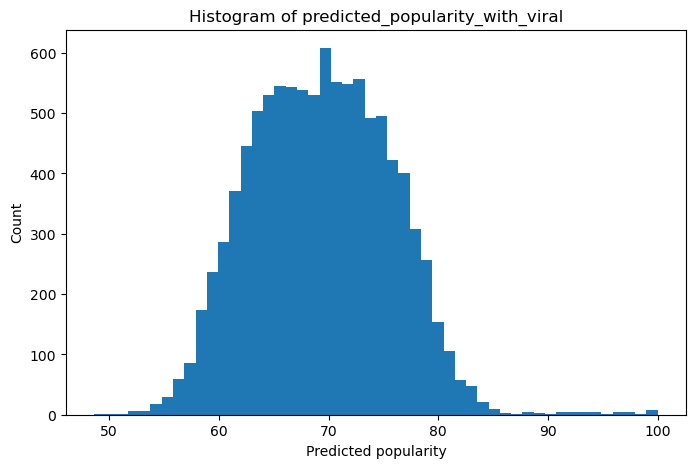

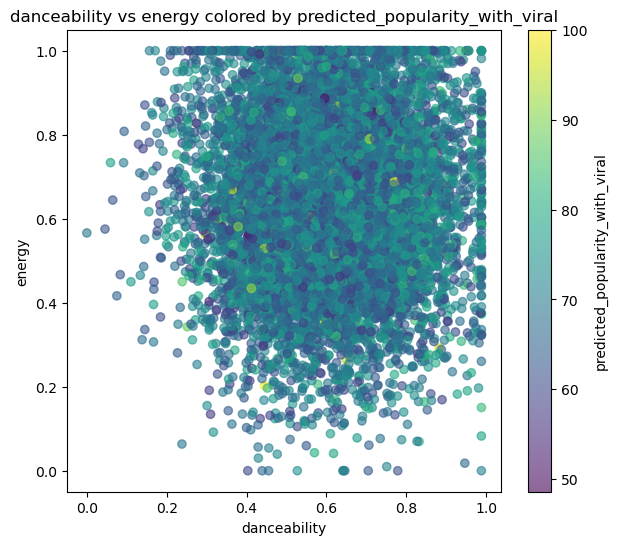

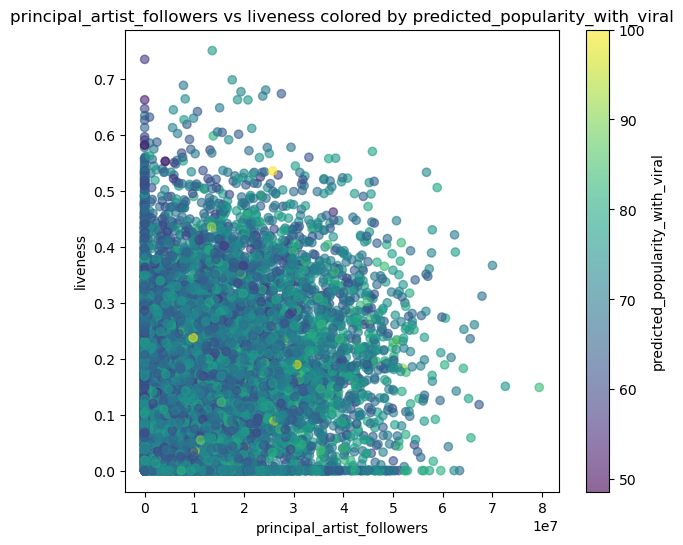

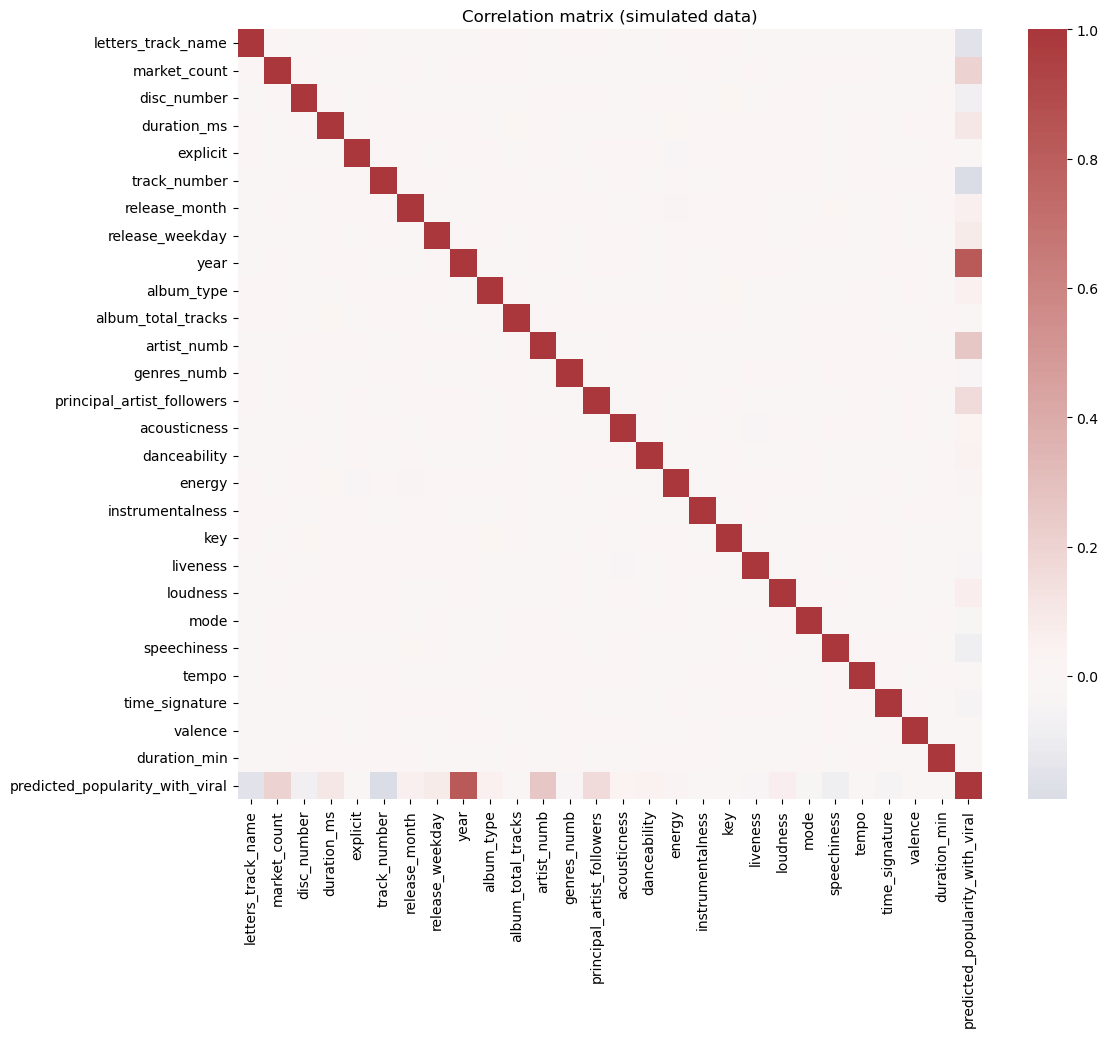

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


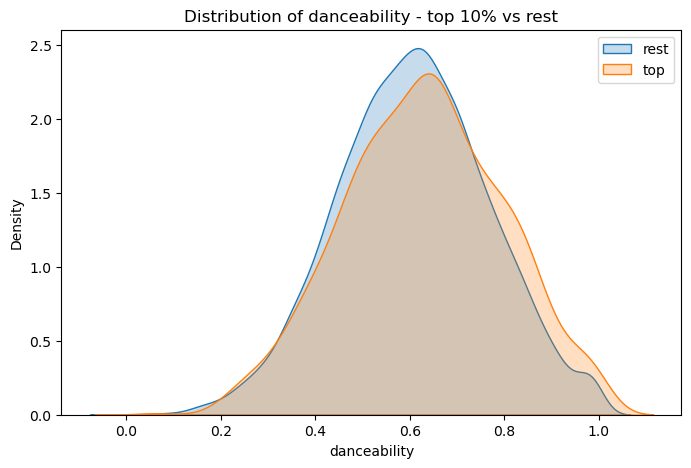

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


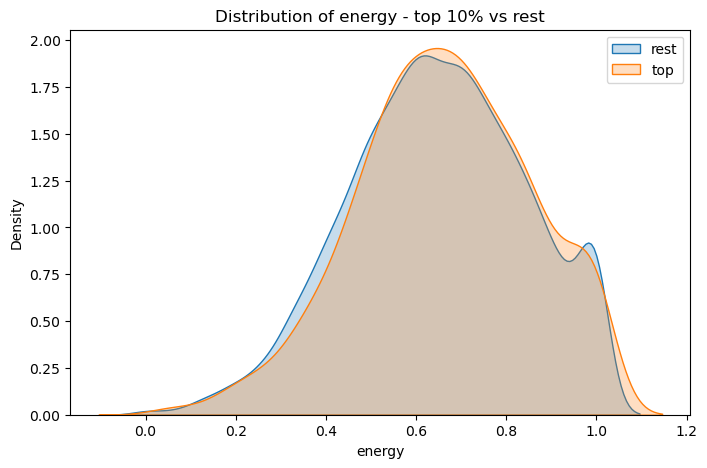

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


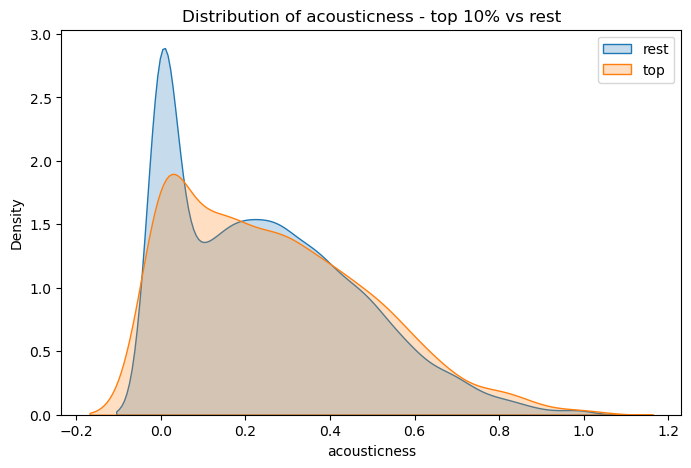

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


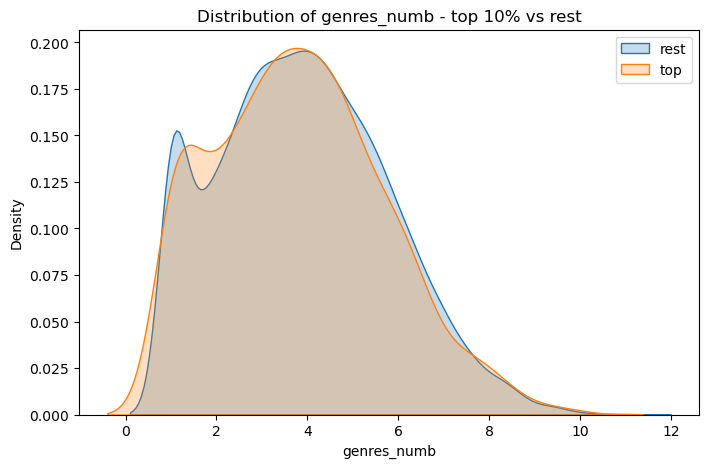

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


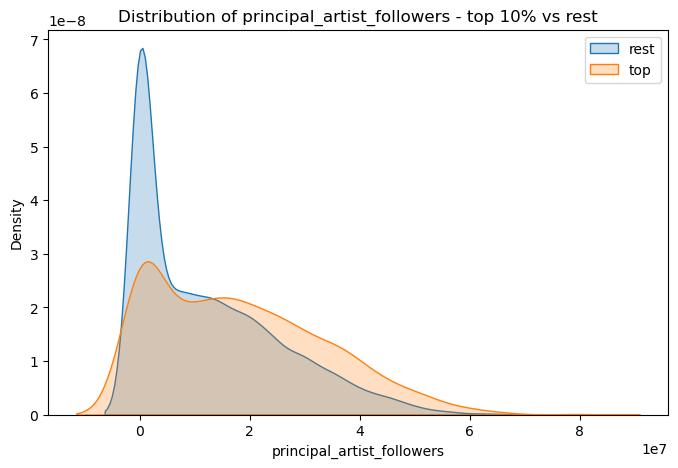

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


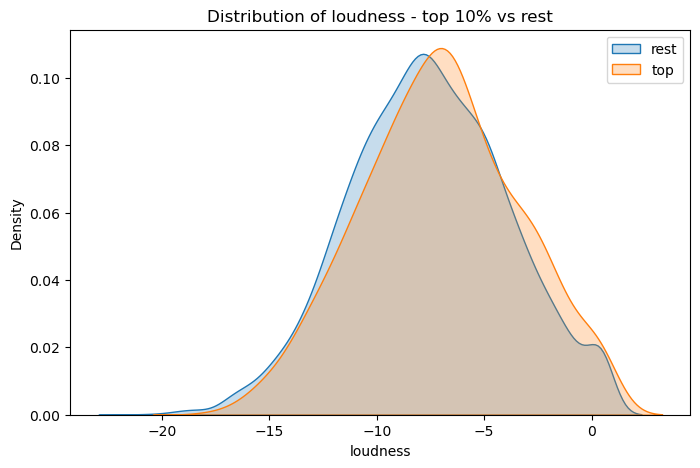

In [55]:
if __name__ == "__main__":
    # Run simulation (adjust n_sims as needed)
    sim_df, stats_df = simulate_songs(df=df, model=model, predictor_cols=predictor_cols, n_sims=DEFAULT_N_SIMS)
    print("Simulated shape:", sim_df.shape)
    print("Predictor stats:\n", stats_df)

    # Basic analysis
    top, rest, summary = analyze_top(sim_df, pct=TOP_PCT)
    print(f"Top {int(TOP_PCT*100)}% count:", len(top))
    display_cols = ['top_mean', 'rest_mean', 'mean_diff']
    print("Top vs Rest summary (top mean - rest mean):")
    print(summary[display_cols].head(20))

    # Plots
    plot_histogram(sim_df, col='predicted_popularity_with_viral')
    # Two-feature scatter examples (change to features you'd like)
    plot_scatter(sim_df, 'danceability', 'energy')
    plot_scatter(sim_df, 'principal_artist_followers', 'liveness')
    plot_correlation_heatmap(sim_df)

    # Visual comparisons for top vs rest for interesting features
    for feat in ['danceability', 'energy', 'acousticness', 'genres_numb', 'principal_artist_followers', 'loudness']:
        if feat in sim_df.columns:
            plot_top_vs_rest_feature(sim_df, feat)

    # Save simulated dataset if you want
    # sim_df.to_csv('simulated_songs.csv', index=False)